## Exercise 2

In [5]:
import numpy as np
from tensorflow.keras.models import Sequential, Model # Model para 2 b)
from tensorflow.keras.layers import Dense, Input, Concatenate # Input e Concatenate adicionado para 2 b)
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd

#### Inputs / Labels / Functions

In [6]:
x = np.array([[0,0], [0,1], [1,0], [1,1]], "float32")
y = np.array([[0], [1], [1], [0]], "float32")

In [7]:
# Function for plots
def plot_keys (a, b, c):
    plt.figure(figsize=(20,10))
    plt.subplot(2, 1, 1)
    plt.plot(histories[a].history["loss"]) # no momentum
    plt.plot(histories[b].history["loss"]) # .4 momentum
    plt.plot(histories[c].history["loss"]) # .9 momentum
    plt.title(str("loss"))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend([str(res[a]), str(res[b]), str(res[c])], loc='upper left')
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(20,10))
    plt.subplot(2, 1, 2) 
    plt.plot(histories[a].history["accuracy"]) # no momentum
    plt.plot(histories[b].history["accuracy"]) # .4 momentum
    plt.plot(histories[c].history["accuracy"]) # .9 momentum
    plt.title(str("accuracy"))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.ylim(0, 1)
    plt.legend([str(res[a]), str(res[b]), str(res[c])], loc='upper left')
    plt.tight_layout()
    
    plt.show()

## a)

### Compile Networks

In [125]:
momentum_list = [0.0, .4, .9] 
act_fun = ["sigmoid","tanh","relu"]
num_epochs = 5000

In [227]:
# Function to compile with diferent act. function and with or without momentum
def compiler_a (test_values, function):
    model = Sequential([Dense(2, activation = function), Dense(1, activation = function)])
    model.compile(loss="mean_squared_error", optimizer = SGD(momentum = test_values, learning_rate = .001), metrics = ["accuracy"]) # Learning Rate default is .001
    history = model.fit(x, y, epochs = num_epochs, batch_size = 1, verbose = 0)
    return history


In [128]:
# Create models
histories = [compiler_a(a,b) for a in momentum_list for b in act_fun]

    #histories[1].history

In [184]:

#order of combinations of hyperparameters
res = [(a,b) for a in momentum_list for b in act_fun]
a = 0
for i in res:
    print(str(a) + str(i))
    a += 1

0(0.0, 'sigmoid')
1(0.0, 'tanh')
2(0.0, 'relu')
3(0.4, 'sigmoid')
4(0.4, 'tanh')
5(0.4, 'relu')
6(0.9, 'sigmoid')
7(0.9, 'tanh')
8(0.9, 'relu')


### Analyse momentum and activation functions effect

#### sigmoid

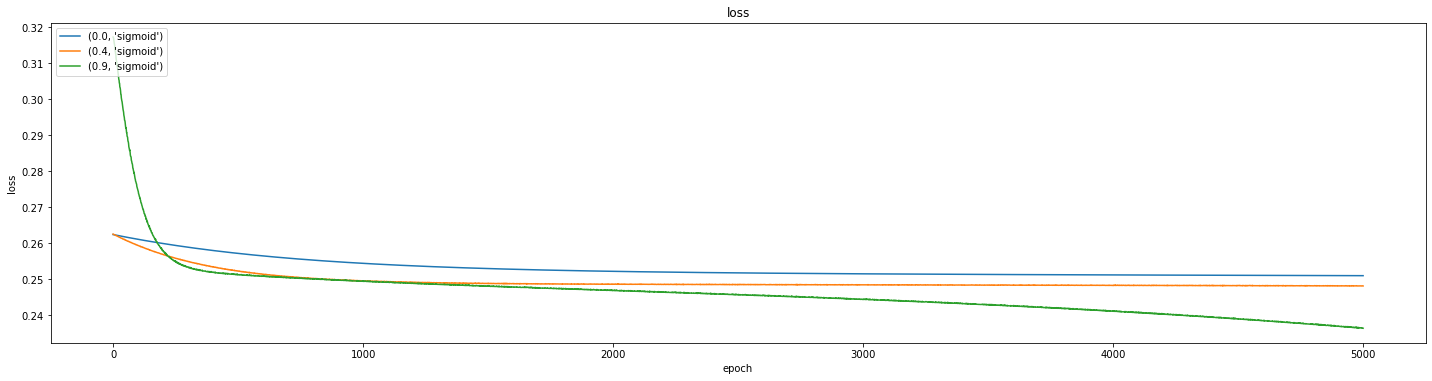

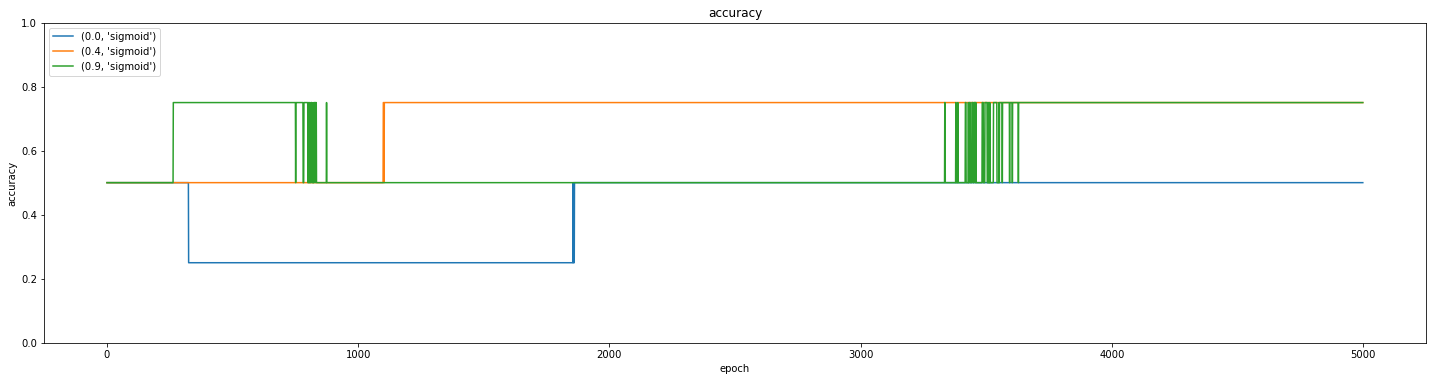

In [255]:
plot_keys(0, 3, 6)

#### relu

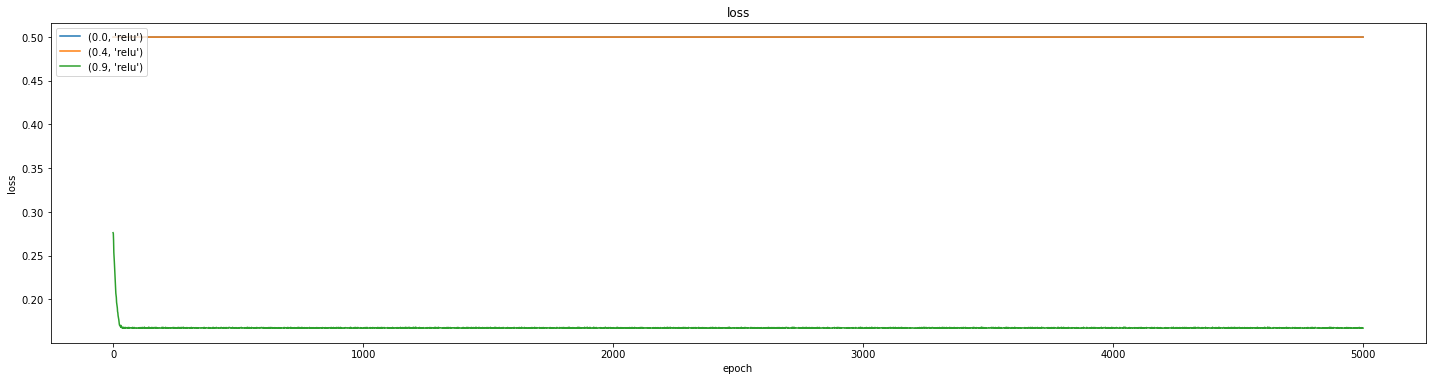

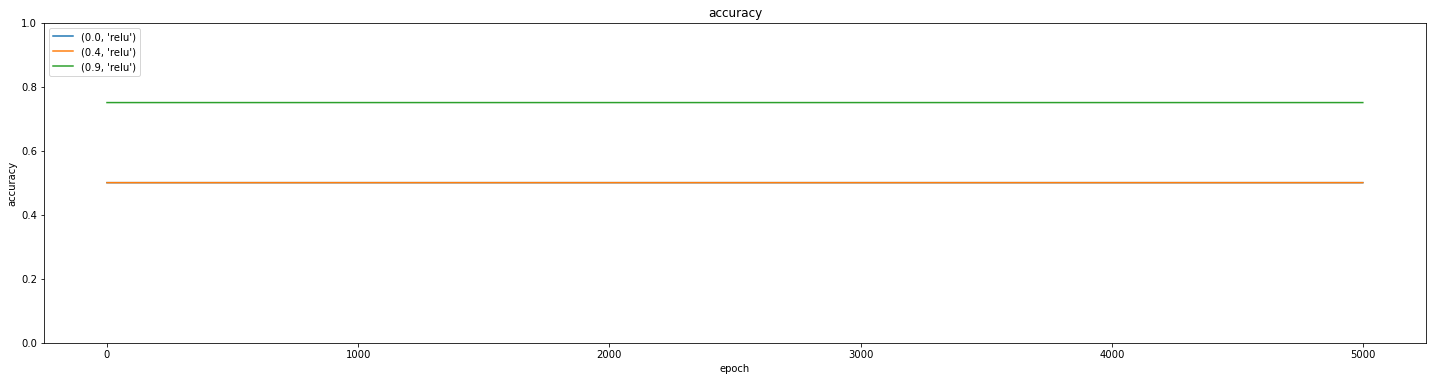

In [258]:
plot_keys(2, 5, 8)

#### tahn

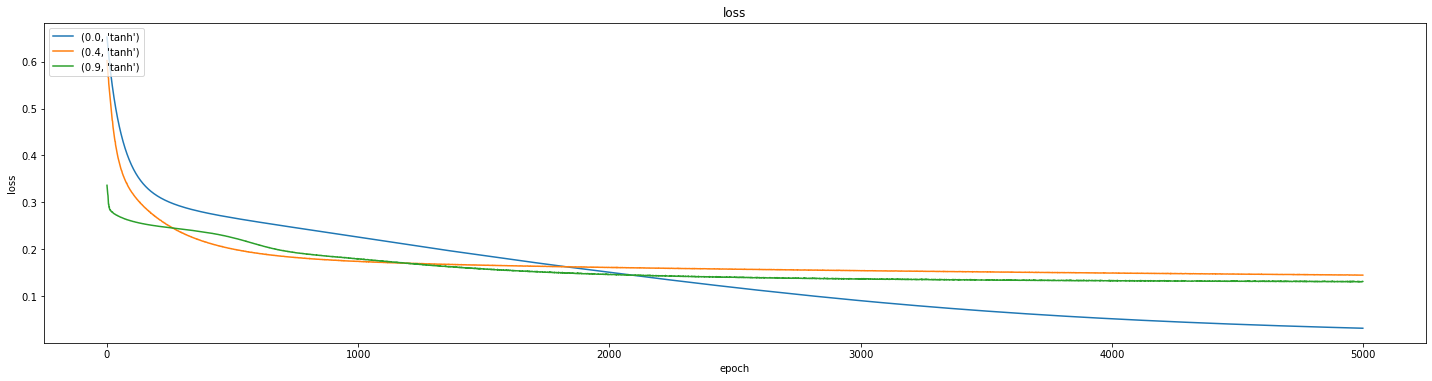

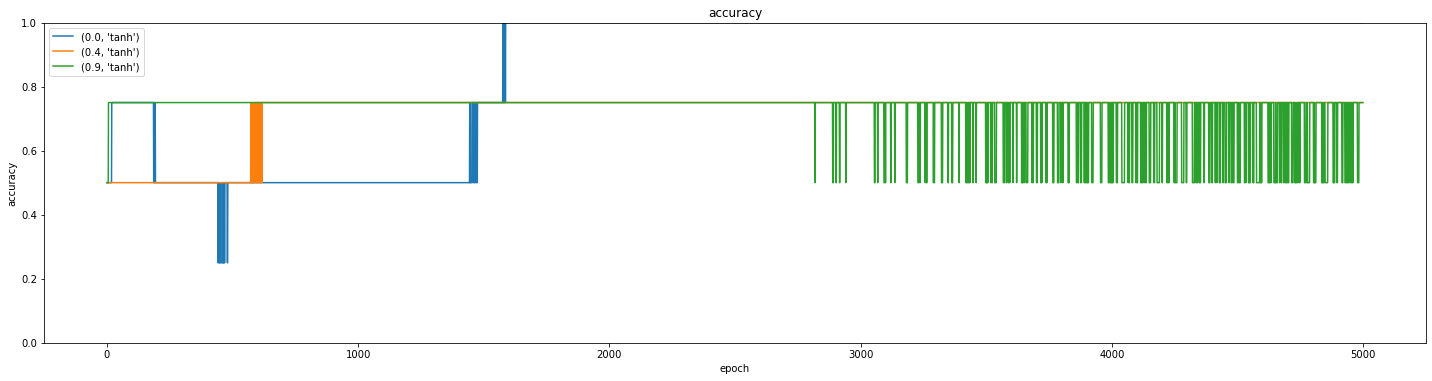

In [259]:
plot_keys(1, 4, 7)

#### Observations

**sigmoid**\
Analyzing the loss for sigmoid with 0.9 momentum it starts with a spike of
high loss but ends up with the least values for it with the increase
of number of epochs.
Between 0.4 and 0.0 the difference is small but with .4 momentum the 
loss value was slightly inferior.

Analyzing the accuracy for sigmoid with no momentum the max accuracy 
reaches .5 most of the time with the exception of the interval between
around 300 and 2000 epochs roughly
    With .9 momentum it reaches .75 accuracy quickly but with the increase
of nr of epochs it lowers again and only rises up at around 3200 epochs
which can be related to the sudden decrease in loss followed by a 
stabilization of its values followed again for higher values of epochs 
of a decrease more so than in the other two cases.
    With 0.4 momentum on the sigmoid the accuracy is rather stable from 1200
epochs with .75 accuracy which coincides with the behaviour of the line
representing the loss for this same model.

**relu**\
    Analyzing the loss for relu without momentum, we can see there is no variation.
For no momentum and .4 there is no variation in loss, maintaining .5 of loss 
from 0 to 5000 epochs.
For .9 of momentum we can see an abrupt fall at 0 epochs and then stabilizing 
until 5000 epochs, obtaining much lower values of loss than with no momentum and
with .4 of momentum.

The same patterns are observed for accuracy given that with no momentum and .4 it maintains
.5 of accuracy from 0 to 5000 again.
With .9 momentum it maintains almost .8 accuracy from beggining to end.

**tanh**\
The loss Without momentum it steadly declines in a apparently linear fashion from around
150 epochs. It reaches the lowest value of all three recordings.
For 0.4 it is similar to without momentum however it stabilizes and maintains roughly the same
loss values until all epochs have been ran.
For .9 it starts with the lowest loss values, it has some oscilations until around 1000 epochs
and stabilizes like 0.4 momentum curve did until the end.

Speaking of accuracy the no momentum behaviour we can see it reaches the highest accuracy
level at around 1700 epochs of 100%.
For .4 momentum it reaches .75 at around 700 epochs and stabilizes until the end.
On the contrary with 0.9 it reaches .75 at the very start but around 2800 epochs it starts
to oscilate until the end.


**In general**\
We observe a tendency for the loss value to decrease when the momentum value increases on both sigmoid and tanh activation functions. The same isn't true for the relu activation funtion where there is no variation of the loss value for some reason we were unable to explain.
In terms of accuracy there is a tendency for the accuracy to increase as the momentum value increases with sigmoid and tanh activation functions with a greater relative improvement on loss reduction occurring on the tanh Neural Network, and again for the relu there is no variation is observed in terms of accuracy values.

In summary,\
For the sigmoid in this network, .9 momentum seems to deliver a better modell with fewer epochs, meaning a faster learning process.\
For the relu in this network, using .9 of momentum seems to generate a distinctivly better model.\
For the tanh using no momentum seems to be the best approach for higher epochs. But if a lower number of epochs is used (<2000) the use of momentum still generates a better model

## b)

### Compile Networks

In [260]:
# Function to compile with diferent act. function and with or without momentum
def compiler_b (test_values, function):
    inputs = Input(shape=(2,)) 
    out = Dense(1, activation= function)(inputs)
    o = Concatenate(axis=1)([out, inputs]) 
    out2 = Dense(1, activation = function)(o)
    model.compile(loss="mean_squared_error", optimizer = SGD(momentum = test_values), metrics = ["accuracy"]) # Learning Rate default is .001
    history = model.fit(x, y, epochs = num_epochs, batch_size = 1, verbose = 0)
    return history    

In [261]:
# Create models
histories = [compiler_b(a,b) for a in momentum_list for b in act_fun]

In [262]:
#order of combinations of hyperparameters
res = [(a,b) for a in momentum_list for b in act_fun]
a = 0
for i in res:
    print(str(a) + str(i))
    a += 1

0(0.0, 'sigmoid')
1(0.0, 'tanh')
2(0.0, 'relu')
3(0.4, 'sigmoid')
4(0.4, 'tanh')
5(0.4, 'relu')
6(0.9, 'sigmoid')
7(0.9, 'tanh')
8(0.9, 'relu')


### Analyse momentum and activation functions effect

#### sigmoid

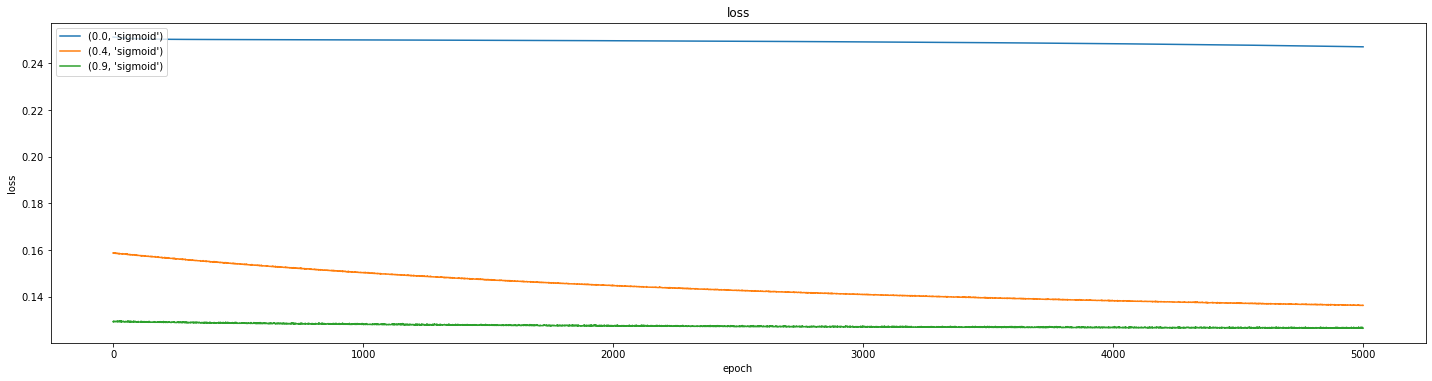

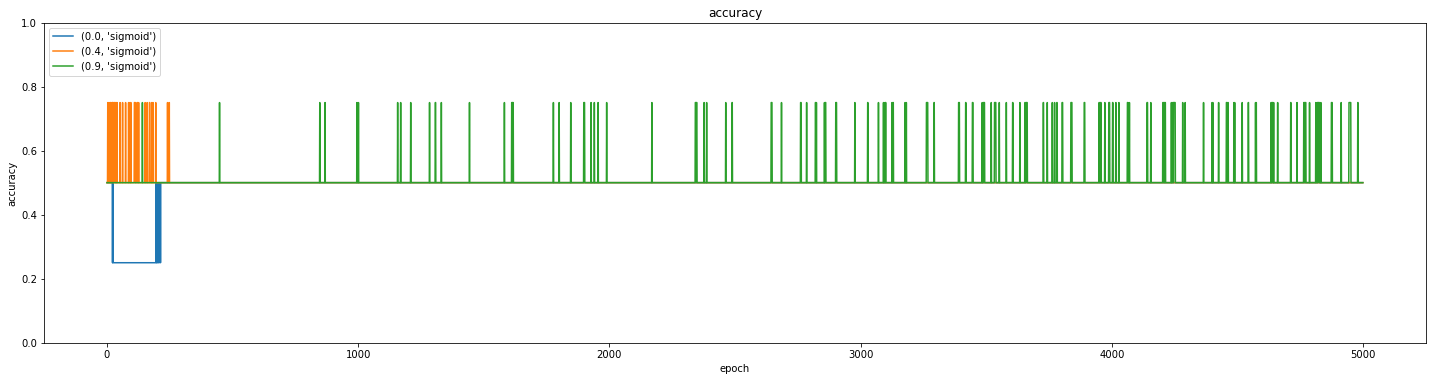

In [264]:
plot_keys(0, 3, 6)

#### tanh

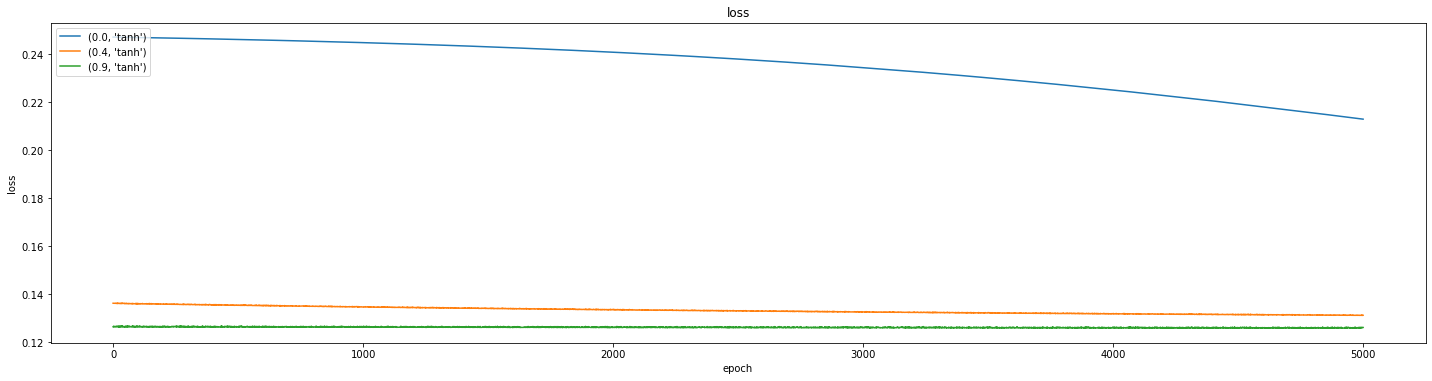

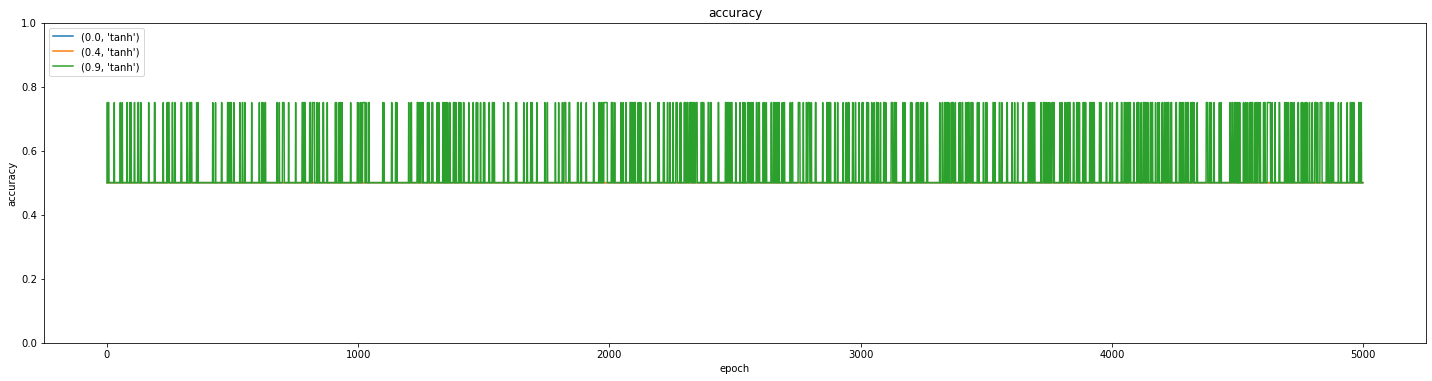

In [265]:
plot_keys(1, 4, 7)

#### relu

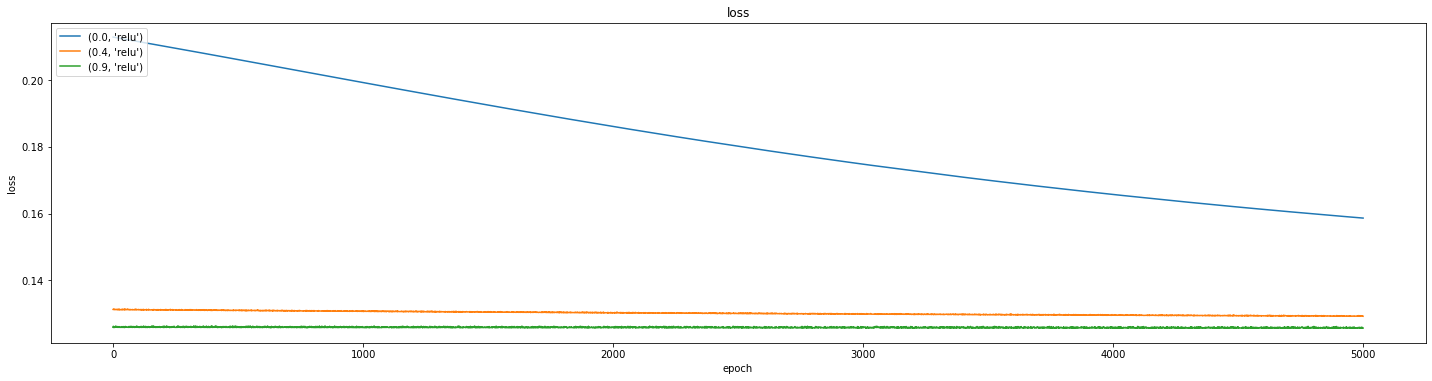

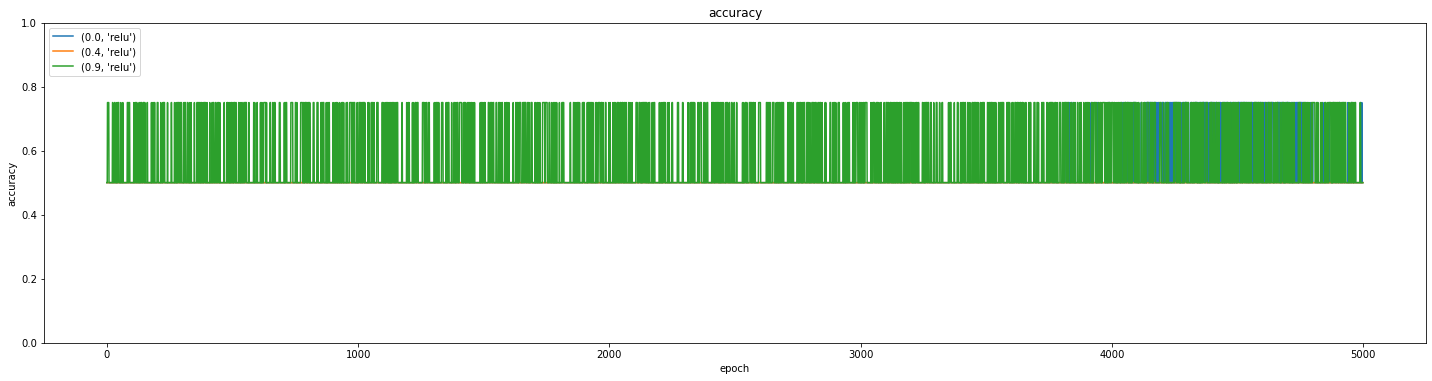

In [266]:
plot_keys(2, 5, 8)

#### Observations

**sigmoid**\
From the three values of momentum the lowest vakue of  loss was with .9 momentum.
Still there is no big variation between the 3 momentum values in terms of loss. For 0.4 it is slightly higher and
is decreasing along the number of epochs ran.

For accuracy with no momentum we observe how the accuracy is at its lowest at the start.
There is a certain variation of accuracy until around 150 epochs, but then stabilizes at
around .5 of accuracy. For .4 momentum it varies aswell in the higher accuracy capacity 
but this pattern is restricted to the same rough interval of values as it did for no momentum
it stabilizes at 0.5 until the end too.
Then for .9 momentum the accuracy oscilates all throughout the entire number of epochs
with a perceived greater intensity towards higher values of epochs.

**tanh**\
The loss for momentum 0.9 was the lowest all over the epochs ran. For .4 it was also low
and for both of these there was no variation from start to finish
For no momentum the loss had a steady decrease but maintaining higher values than it's other
momentum value counterparts.

On the accuracy for no momentum and 0.4 it maintains 0.5 accuracy from start to finish.
For .9 momentum it varies a lot for values between .5 and 0.75 from begining to end.


**relu**\
Speaking of the loss there is a steady decrease similarly to the tanh case
with the difference that for no momentum specifically the loss reaches overall 
smaller values at the end.

On the accuracy the 0.4 momentum it is stable at 0.5 accuracy through and through.
For the no momentum it is also stable at 0.5 accuracy until 4200 epochs when it starts
to alter to 0.75 with some frequency. Finally for the 0.9 it has the highest variation
of values from start to finish even more than in the corresponding case for the tanh 
activation function always changing up from .5 to .75 accuracy.

In general\
There is a tendency for the accuracy as well as the loss to improve as the momentum variable value rises for all activation function\

In summary,
For the 3 activation functions in this network the use of momentum seems to generete a better model in the full range of epochs

## Comparison between 2 Networks

Generally speaking, it is possible to observe the same efects  in terms of loss and accuracy value when varying momentum and activation function on both kinds of Networks meaning that higher momentum value leads to lower loss values and higher accuracy values . \
It is possible to observe that the network tested on b) seems to have more unstable learning process with higher levels of momentum, especialy for relu\
Another important pattern we observed which was expected is the efect of the epochs, meaning that  higher number passes on the data (epochs) leads to values of accuracy and lower values of loss, correlating to better models.